SPAM EMAIL DETECTION USING LOGISTIC REGRESSION
# AI Mini Project - Simple and Well Commented Version


SPAM EMAIL DETECTION PROJECT

STEP 1: Creating Sample Dataset
------------------------------
Total emails: 20
Spam emails: 10
Legitimate emails: 10

Sample emails:
SPAM: URGENT! You won $1000! Call now!
LEGITIMATE: Hi, can we meet for coffee tomorrow?

STEP 2: Text Preprocessing
------------------------------
Cleaning email text...

Preprocessing example:
Original: URGENT! You won $1000! Call now!
Cleaned: urgent 1000 call

STEP 3: Splitting Data (70% train, 30% test)
------------------------------
Training emails: 14
Testing emails: 6

STEP 4: Converting Text to Numbers using TF-IDF
------------------------------
Converting training text to numbers...
Converting test text to numbers...
Number of features (words): 5

STEP 5: Training Logistic Regression Model
------------------------------
Training the model...
Making predictions...
Model training completed!

STEP 6: Model Evaluation
------------------------------
PERFORMANCE METRICS:
Accuracy:  0.833 (83.3%)
Precision: 1.000
Recall:  

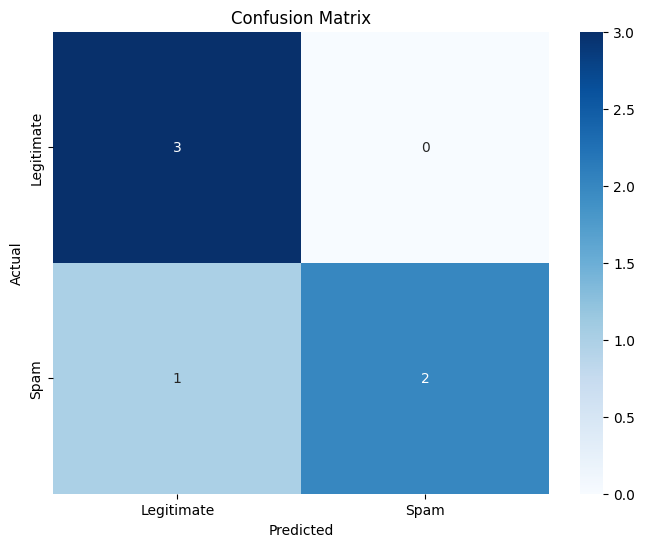


Confusion Matrix Explanation:
True Negatives (Legitimate correctly identified): 3
False Positives (Legitimate wrongly identified as Spam): 0
False Negatives (Spam wrongly identified as Legitimate): 1
True Positives (Spam correctly identified): 2

STEP 8: Most Important Words for Classification
------------------------------
TOP 10 WORDS THAT INDICATE SPAM:
 1. free            (importance: 0.940)
 2. claim           (importance: 0.786)
 3. call            (importance: 0.684)
 4. money           (importance: 0.521)

TOP 10 WORDS THAT INDICATE LEGITIMATE EMAIL:
 1. great           (importance: 0.570)

STEP 9: Testing with New Emails
------------------------------
Testing new emails:

Email 1: URGENT! You won $5000! Call now to claim!
Prediction: SPAM
Confidence: 66.6%
Spam probability: 66.6%

Email 2: Hi Sarah, can we meet for lunch tomorrow?
Prediction: LEGITIMATE
Confidence: 58.7%
Legitimate probability: 58.7%

Email 3: FREE MONEY! No catch! Click here now!
Prediction: SPAM
Confidence:

In [ ]:

# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Text processing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

# Download required NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('punkt')
    nltk.download('stopwords')

print("=" * 50)
print("SPAM EMAIL DETECTION PROJECT")
print("=" * 50)

# ===============================================================
# STEP 1: CREATE SAMPLE DATASET
# ===============================================================
print("\nSTEP 1: Creating Sample Dataset")
print("-" * 30)

def create_sample_data():
    """
    Create sample email data for our project
    In real project, you would load data from CSV file
    """

    # Sample SPAM emails (labeled as 1)
    spam_emails = [
        "URGENT! You won $1000! Call now!",
        "FREE money! Click here immediately!",
        "Congratulations! You won a prize! Call 123-456-7890",
        "WINNER! Claim your reward now!",
        "Limited time offer! Act now! Free cash!",
        "Your mobile won £500! Text CLAIM to 12345",
        "URGENT: Your account expires today! Click here!",
        "Make money fast! Work from home! Call now!",
        "Free loan approved! Bad credit OK! Apply now!",
        "FINAL NOTICE: Claim your prize before it expires!"
    ]

    # Sample LEGITIMATE emails (labeled as 0)
    legitimate_emails = [
        "Hi, can we meet for coffee tomorrow?",
        "Meeting scheduled for 3 PM in room 201",
        "Your order has been shipped successfully",
        "Thank you for your payment. Receipt attached.",
        "Reminder: Doctor appointment on Friday",
        "Great job on the presentation today!",
        "Please review the attached document",
        "Your subscription renewal is due next month",
        "Hope you have a great weekend!",
        "Thanks for helping with the project"
    ]

    # Combine all emails and create labels
    all_emails = spam_emails + legitimate_emails
    # Create labels: 1 for spam, 0 for legitimate
    labels = [1] * len(spam_emails) + [0] * len(legitimate_emails)

    # Create pandas DataFrame
    df = pd.DataFrame({
        'email': all_emails,
        'label': labels
    })

    return df

# Create our dataset
data = create_sample_data()

# Display basic information about our dataset
print(f"Total emails: {len(data)}")
print(f"Spam emails: {sum(data['label'] == 1)}")
print(f"Legitimate emails: {sum(data['label'] == 0)}")

# Show first few examples
print("\nSample emails:")
print("SPAM:", data[data['label'] == 1]['email'].iloc[0])
print("LEGITIMATE:", data[data['label'] == 0]['email'].iloc[0])

# ===============================================================
# STEP 2: TEXT PREPROCESSING
# ===============================================================
print("\nSTEP 2: Text Preprocessing")
print("-" * 30)

def clean_text(text):
    """
    Clean and preprocess email text
    Steps:
    1. Convert to lowercase
    2. Remove punctuation
    3. Remove extra spaces
    4. Remove stopwords (common words like 'the', 'and', etc.)
    5. Keep only meaningful words
    """

    # Step 1: Convert to lowercase
    text = text.lower()

    # Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Step 3: Remove extra spaces
    text = ' '.join(text.split())

    # Step 4: Remove stopwords
    try:
        # Get English stopwords
        stop_words = set(stopwords.words('english'))

        # Split text into words
        words = text.split()

        # Keep only words that are not stopwords and longer than 2 characters
        clean_words = [word for word in words if word not in stop_words and len(word) > 2]

        # Join words back into text
        text = ' '.join(clean_words)

    except:
        # If NLTK stopwords not available, just return the text
        pass

    return text

# Apply preprocessing to all emails
print("Cleaning email text...")
data['clean_email'] = data['email'].apply(clean_text)

# Show example of preprocessing
print("\nPreprocessing example:")
print("Original:", data['email'].iloc[0])
print("Cleaned:", data['clean_email'].iloc[0])

# ===============================================================
# STEP 3: SPLIT DATA INTO TRAINING AND TESTING SETS
# ===============================================================
print("\nSTEP 3: Splitting Data (70% train, 30% test)")
print("-" * 30)

# Separate features (X) and labels (y)
X = data['clean_email']  # Email text features
y = data['label']        # Labels (0 or 1)

# Split data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,      # 30% for testing
    random_state=42,    # For reproducible results
    stratify=y          # Keep same ratio of spam/legitimate in both sets
)

print(f"Training emails: {len(X_train)}")
print(f"Testing emails: {len(X_test)}")

# ===============================================================
# STEP 4: CONVERT TEXT TO NUMBERS (TF-IDF)
# ===============================================================
print("\nSTEP 4: Converting Text to Numbers using TF-IDF")
print("-" * 30)

# Create TF-IDF vectorizer
# TF-IDF = Term Frequency - Inverse Document Frequency
# It converts text to numbers based on word importance
tfidf_vectorizer = TfidfVectorizer(
    max_features=500,    # Use top 500 most important words
    ngram_range=(1, 2),  # Use single words and pairs of words
    min_df=2,            # Word must appear in at least 2 emails
    max_df=0.8           # Ignore words that appear in more than 80% of emails
)

# Fit the vectorizer on training data and transform it
print("Converting training text to numbers...")
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data using the same vectorizer
print("Converting test text to numbers...")
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Number of features (words): {X_train_tfidf.shape[1]}")

# ===============================================================
# STEP 5: TRAIN LOGISTIC REGRESSION MODEL
# ===============================================================
print("\nSTEP 5: Training Logistic Regression Model")
print("-" * 30)

# Create logistic regression model
# Logistic regression is good for binary classification (spam vs not spam)
model = LogisticRegression(
    random_state=42,    # For reproducible results
    max_iter=1000       # Maximum iterations for training
)

# Train the model
print("Training the model...")
model.fit(X_train_tfidf, y_train)

# Make predictions on test data
print("Making predictions...")
y_pred = model.predict(X_test_tfidf)

print("Model training completed!")

# ===============================================================
# STEP 6: EVALUATE MODEL PERFORMANCE
# ===============================================================
print("\nSTEP 6: Model Evaluation")
print("-" * 30)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display results
print("PERFORMANCE METRICS:")
print(f"Accuracy:  {accuracy:.3f} ({accuracy*100:.1f}%)")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1 Score:  {f1:.3f}")

# What do these metrics mean?
print("\nWhat these metrics mean:")
print("- Accuracy: Overall correctness of predictions")
print("- Precision: Of predicted spam, how many were actually spam")
print("- Recall: Of actual spam, how many were correctly identified")
print("- F1 Score: Balance between precision and recall")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Spam']))

# ===============================================================
# STEP 7: CONFUSION MATRIX VISUALIZATION
# ===============================================================
print("\nSTEP 7: Confusion Matrix")
print("-" * 30)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legitimate', 'Spam'],
            yticklabels=['Legitimate', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Explain confusion matrix
print("\nConfusion Matrix Explanation:")
print(f"True Negatives (Legitimate correctly identified): {cm[0,0]}")
print(f"False Positives (Legitimate wrongly identified as Spam): {cm[0,1]}")
print(f"False Negatives (Spam wrongly identified as Legitimate): {cm[1,0]}")
print(f"True Positives (Spam correctly identified): {cm[1,1]}")

# ===============================================================
# STEP 8: ANALYZE IMPORTANT WORDS
# ===============================================================
print("\nSTEP 8: Most Important Words for Classification")
print("-" * 30)

# Get feature names (words) and their importance coefficients
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Find words that strongly indicate SPAM (positive coefficients)
spam_words = []
for i, coef in enumerate(coefficients):
    if coef > 0:  # Positive coefficient means it indicates spam
        spam_words.append((feature_names[i], coef))

# Sort by importance and get top 10
spam_words = sorted(spam_words, key=lambda x: x[1], reverse=True)[:10]

# Find words that strongly indicate LEGITIMATE emails (negative coefficients)
legit_words = []
for i, coef in enumerate(coefficients):
    if coef < 0:  # Negative coefficient means it indicates legitimate email
        legit_words.append((feature_names[i], abs(coef)))

# Sort by importance and get top 10
legit_words = sorted(legit_words, key=lambda x: x[1], reverse=True)[:10]

# Display results
print("TOP 10 WORDS THAT INDICATE SPAM:")
for i, (word, importance) in enumerate(spam_words, 1):
    print(f"{i:2d}. {word:15s} (importance: {importance:.3f})")

print("\nTOP 10 WORDS THAT INDICATE LEGITIMATE EMAIL:")
for i, (word, importance) in enumerate(legit_words, 1):
    print(f"{i:2d}. {word:15s} (importance: {importance:.3f})")

# ===============================================================
# STEP 9: TEST WITH NEW EMAILS
# ===============================================================
print("\nSTEP 9: Testing with New Emails")
print("-" * 30)

def predict_new_email(email_text):
    """
    Predict if a new email is spam or legitimate
    """
    # Clean the email text
    clean_email = clean_text(email_text)

    # Convert to TF-IDF features
    email_tfidf = tfidf_vectorizer.transform([clean_email])

    # Make prediction
    prediction = model.predict(email_tfidf)[0]

    # Get probability scores
    probabilities = model.predict_proba(email_tfidf)[0]
    legit_prob = probabilities[0]
    spam_prob = probabilities[1]

    # Return results
    return {
        'prediction': 'SPAM' if prediction == 1 else 'LEGITIMATE',
        'spam_probability': spam_prob,
        'legitimate_probability': legit_prob,
        'confidence': max(spam_prob, legit_prob)
    }

# Test with new emails
test_emails = [
    "URGENT! You won $5000! Call now to claim!",
    "Hi Sarah, can we meet for lunch tomorrow?",
    "FREE MONEY! No catch! Click here now!",
    "Your package will arrive tomorrow"
]

print("Testing new emails:")
for i, email in enumerate(test_emails, 1):
    result = predict_new_email(email)
    print(f"\nEmail {i}: {email}")
    print(f"Prediction: {result['prediction']}")
    print(f"Confidence: {result['confidence']:.1%}")
    if result['prediction'] == 'SPAM':
        print(f"Spam probability: {result['spam_probability']:.1%}")
    else:
        print(f"Legitimate probability: {result['legitimate_probability']:.1%}")

# ===============================================================
# STEP 10: FINAL SUMMARY AND INSIGHTS
# ===============================================================
print("\n" + "="*50)
print("PROJECT SUMMARY")
print("="*50)

print(f"\n MODEL PERFORMANCE:")
print(f"   • Final Accuracy: {accuracy:.1%}")
print(f"   • F1 Score: {f1:.3f}")

print(f"\n KEY FINDINGS:")
print(f"   • Spam emails often contain: {', '.join([word for word, _ in spam_words[:3]])}")
print(f"   • Legitimate emails often contain: {', '.join([word for word, _ in legit_words[:3]])}")

print(f"\n WHAT WE LEARNED:")
print(f"   • Text preprocessing is crucial for good results")
print(f"   • TF-IDF helps convert text to meaningful numbers")
print(f"   • Logistic regression works well for binary classification")
print(f"   • Words like 'urgent', 'free', 'money' are strong spam indicators")

print(f"\n POSSIBLE IMPROVEMENTS:")
print(f"   • Use larger dataset with more examples")
print(f"   • Try other algorithms (Naive Bayes, SVM)")
print(f"   • Add more features (email length, special characters)")
print(f"   • Use more advanced text preprocessing")

print(f"\n PROJECT COMPLETED SUCCESSFULLY!")

# Optional: Save the model for future use
try:
    import joblib
    # Save the trained model
    joblib.dump(model, 'spam_model.pkl')
    # Save the TF-IDF vectorizer
    joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')
    print(f"\n💾 Model saved as 'spam_model.pkl'")
    print(f"   TF-IDF vectorizer saved as 'tfidf_vectorizer.pkl'")
    print(f"   You can load them later using joblib.load()")
except ImportError:
    print(f"\n💾 To save the model, install joblib: pip install joblib")

print("\n" + "="*50)